In [1]:
!pip install tifffile

You should consider upgrading via the '/Users/logan/anaconda3/bin/python -m pip install --upgrade pip' command.


In [2]:
import tifffile
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [4]:
%matplotlib inline

# Step 0: Read in two images

In [79]:
start_img = tifffile.imread('img_sub.tif')
background_img = tifffile.imread('bg.tif')
print( "Start Image Size:", img.shape )
print( "Background Image Size:", img.shape )

Start Image Size: (371, 239)
Background Image Size: (371, 239)


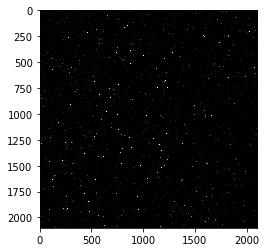

In [80]:
plt.imshow(start_img, cmap='gray')

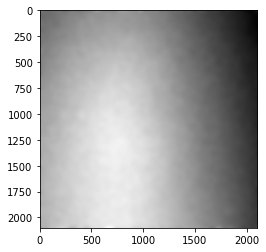

In [81]:
plt.imshow(background_img, cmap='gray')

# Step 1: calculate the mean of the background image:

In [83]:
background_mean = np.mean( background_img )
print( background_mean )

27798.18433537415


# Step 2: Perform the correction

In [107]:
corrected_image = (start_img.astype(float) / background_img.astype(float))
corrected_image *= background_mean

# Step 3: Force back to 16-bit and export

In [108]:
np.min( corrected_image ), np.max( corrected_image )

(0.0, 109343.11220425298)

In [112]:
corrected_image_final = corrected_image / np.max( corrected_image )
corrected_image_final *= 2**16 - 1
#corrected_image_final = corrected_image.astype( np.uint8 )

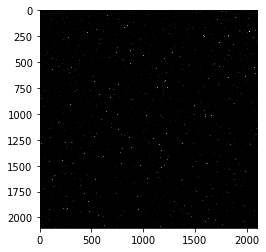

In [121]:
plt.imshow( corrected_image_final.astype(np.uint16), cmap='gray')

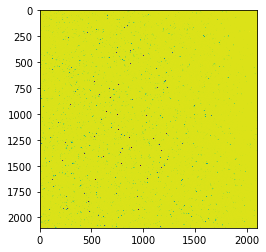

In [120]:
# this image shows the difference from the before/after,
# note how the points are now much more uniform in brightness vs. original

plt.imshow( corrected_image_final.astype(float) - start_img )

In [123]:
tifffile.imwrite( 'out.tif', corrected_image_final.astype(np.uint16) )